<a href="https://colab.research.google.com/github/hongwon2/HG-MLDL/blob/main/%ED%8C%A8%EC%85%98_%EC%97%A0%EB%8B%88%EC%8A%A4%ED%8A%B8_%EA%B0%80%EC%9E%A5_%EC%89%AC%EC%9A%B4_%EB%B2%84%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다른거 다 필요 없고 일단 이거 부터 이해
## 심층 신경망으로 Fashion 분류 모델 생성하기

In [ ]:
import tensorflow as tf #딥러닝을 하는 라이브러리 (머신러닝의 sklearn 같은 것) - 딥러닝은 주로 이미지 분류 할때 씀
import numpy as np

# 1. Fashion MNIST 데이터셋 임포트
fashion_mnist = tf.keras.datasets.fashion_mnist # 패션 사진 7만장 각 사진은 28*28 픽셀, 각 픽셀 값은 0~255 (색깔을 나타냄 - 검정 : 0 ~ 흰색 : 255)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() #훈련 6만장 , 테스트 1만장으로 나눔

print(train_images[0]) # 모니터 크기에 따라 깨질 수 있지만, 신발 모양 픽셀 값임을 알 수 있음 . 
print("----------------------------------")
print(train_labels[0]) # 10가지 옷 종류가 있음(0~9번) - 9번이 신발 인가 봄

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [ ]:
# 2. 데이터 전처리
train_images, test_images = train_images / 255.0, test_images / 255.0
# 아까 나눈 훈련 세트60000만 장과 검증 세트 10000장의 이미지 픽셀 값을 255.0으로 나누어 줌
# 그럼 0~255의 값을 0~1 사이의 값으로 알 수 있음.

In [ ]:
# 3. 모델 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
#sequential라이브러리를 사용하여 딥러닝 구조를 쉽게 구현 

#flatten - 28*28 정사각형 형태의 픽셀 값을 1자 세로 직선으로 펴줌 = 입력층으로 만들어 줌 -> 784의 픽셀 값을 1자 형태로 만들어 준것
# 중간 dense - 밀집층을 만들어 줌(= 은닉층) 각 층에는 노드가 있어서 이전 층의 값을 저장한 후, 각 층의 기준 활성화 함수(activation)를 적용하여 다른 값으로 만들어 줌 (784 * 100)  @@@실제 연산에서는 오차값 1개 추가하여 785 * 100을 함
# 마지막 dense - 마지막 은닉층(출력층)은 노드를 옷 종류(label)의 갯수인 10개로 만들어 줌, 활성화 함수를 softmax를 써서 '이 옷이 어떤 종류의 옷인가'를 구별 할 수 있음. 그런 역할을 하는 함수임

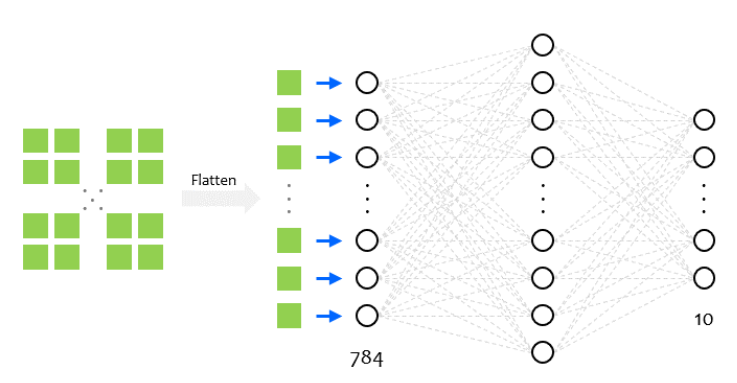

In [ ]:
# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# 3번으로 만든 모델을 더 정확하게 하기 위해 설정값 3가지를 지정해줌

#keras.Model.compile()에는 세 개의 파라미터가 중요하다. (딥러닝의 설정치 모음 느낌)
#● optimizer : 훈련 과정을 설정하는 것으로, Adam, SGD 등이 있다
#● loss : 최적화 과정에서 오차를 최소화될 손실함수를 설정하는 것으로, MSE(평균 제곱 오차)와 2개 분류 시 binary_crossentropy, 3개 이상 분류 시 sparse_categorical_crossentropy가 자주 사용된다
#● metrics : 훈련이 잘 되고 있는지 평가하는 기준을 설정하는 것으로. 주로 accuracy 로 모델을 평가 함

In [ ]:
# 5. 모델 훈련
model.fit(train_images, train_labels, epochs=5)
#만든 모델로 train 셋을 적용 하여 훈련 시킴.
#epochs 란 훈련 횟수를 말함 이 모델은 5번 훈련 한다는 말. - 훈련을 할수록 오차는 작아지고 정확도는 올라감 

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4782 - accuracy: 0.8290
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3620 - accuracy: 0.8676
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3243 - accuracy: 0.8808
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3005 - accuracy: 0.8891
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2812 - accuracy: 0.8957


In [ ]:
# 6.정확도 평가
model.evaluate(test_images, test_labels)
# test 세트를 훈련된 모델에 넣어 평가 결과를 보면 됨
# 0.3 - loss(오차값) , 0.8 - accuracy(정확도)

313/313 [==============================] - 1s 2ms/step - loss: 0.3492 - accuracy: 0.8780


[0.349203497171402, 0.878000020980835]

# 한눈에 보기

In [ ]:
import tensorflow as tf
import numpy as np

# 1. Fashion MNIST 데이터셋 임포트
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


# 2. 데이터 전처리
train_images, test_images = train_images / 255.0, test_images / 255.0


# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# 5. 모델 훈련
model.fit(train_images, train_labels, epochs=5)


# 6. 정확도 평가하기
model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5034 - accuracy: 0.8243
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3772 - accuracy: 0.8630
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3410 - accuracy: 0.8758
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3185 - accuracy: 0.8830
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3623 - accuracy: 0.8687


[0.3623303174972534, 0.8687000274658203]